In [2]:
# web scraping
# BeautifulSoup: Es una librería de Python que se usa para hacer web scraping. Parsea (traduce) el HTML a una estructura de Python.
# Te permite buscar elementos con: etiquetas, clases (class="algo"),identificadores (id="algo"), atributos (href=, src=, etc.)
# Link: https://pypi.org/project/beautifulsoup4/

# Importamos librerías
import pandas as pd
import requests
from bs4 import BeautifulSoup
import random
import matplotlib.pyplot as plt

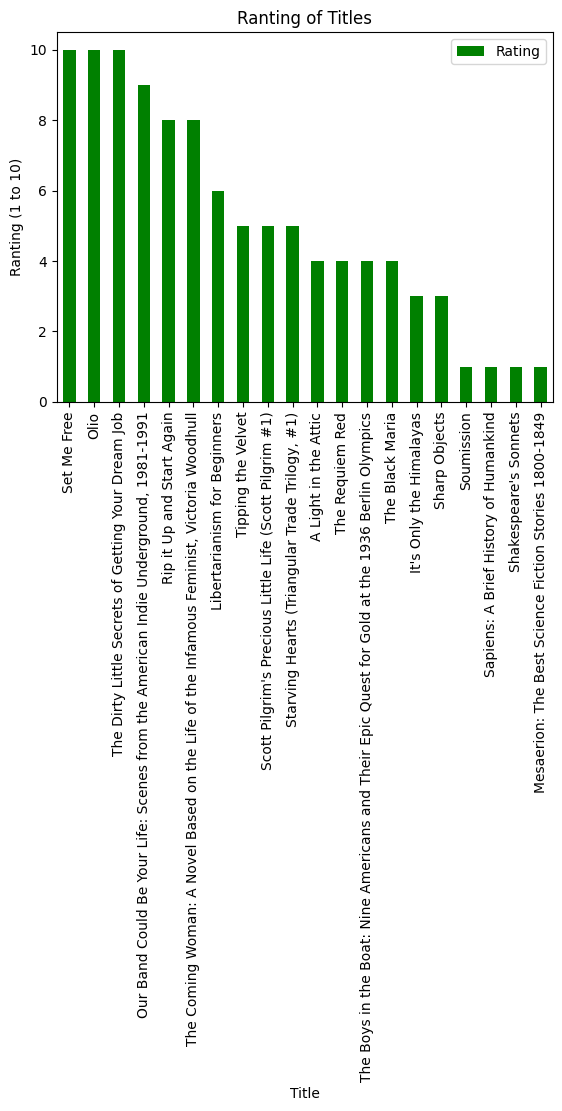

,Title,Rating
12,Set Me Free,10
16,Olio,10
6,The Dirty Little Secrets of Getting Your Dream...,10
15,Our Band Could Be Your Life: Scenes from the A...,9
14,Rip it Up and Start Again,8
7,The Coming Woman: A Novel Based on the Life of...,8
18,Libertarianism for Beginners,6
1,Tipping the Velvet,5
13,Scott Pilgrim's Precious Little Life (Scott Pi...,5
10,"Starving Hearts (Triangular Trade Trilogy, #1)",5


In [82]:
# Obtenemos una solicitud.
url = 'http://books.toscrape.com/'
response = requests.get(url)

# Consulto si la solicitud fue exitosa.
if response.status_code == 200:
    soup = BeautifulSoup(response.text,'html.parser')
    books = soup.find_all('article',class_='product_pod')
    # Lista de Compresion. Dentro de cada objeto "books" acceso a los elementos h3 y a. Esto lo recorro dentro de books y lo almaceno en  title
    title = [books.h3.a['title'] for books in books]
    # Creo un DataFrame
    df_title = pd.DataFrame({'Title': title})
    # Agrego una columna de Rating (rellenar con números del 1 al 10)
    df_title['Rating'] = [random.randint(1,10) for _ in range(len(df_title))]
    # Ordeno por Rating
    df_title = df_title.sort_values('Rating', ascending=False)
    # Grafico
    ax = df_title.plot(kind= 'bar', x='Title', y='Rating', color='green')
    plt.title('Ranting of Titles')
    plt.ylabel('Ranting (1 to 10)')
    plt.xticks(rotation=90)
    plt.show()
else:
    print('Error en la solicitud {response.status_code}')
df_title

In [83]:
# DATA WRANGLING
# PASOS:
# 1. Definición de objetivo Es el punto de partida. El equipo define qué quiere resolver con datos, por ejemplo: “¿Qué clientes están en riesgo de cancelar?”
# 2. Contexto comercial Se entiende el entorno del negocio: la industria, el producto, los usuarios, los procesos. Es clave para traducir el problema en algo útil para el cliente o la empresa.
# 3. Problema comercial Se formula el problema concreto a resolver: por ejemplo, “predecir el churn”(pérdida de clientes- rotación o deserción) , “detectar fraudes” o “mejorar la recomendación”.
# 4. Data Acquisition (Adquisición de datos) Se recolectan los datos necesarios: desde bases internas, APIs, scraping, sensores, bases públicas, etc.
# 5. Exploratory Data Analysis (EDA) Se hace un primer análisis exploratorio: se visualiza, se describe y se busca entender patrones, outliers, tendencias, correlaciones, etc.
# 6. Data Wrangling (Munging) Fase de limpieza, transformación y reestructuración de datos. ¡Ojo! Esto suele representar ~60% del trabajo de un Data Scientist,incluye:
   # Quitar duplicados
   # Convertir tipos de datos
   # Rellenar valores faltantes
   # Normalizar nombres, etc.
# 7. Selección del algoritmo Se elige el modelo más adecuado (regresión, clustering, clasificación, etc.), según el problema y los datos disponibles.
# 8. Desarrollo del algoritmo Se entrena el modelo con los datos, se ajustan los parámetros, se evalúan métricas.
# 9. Validación y despliegue Se valida el modelo con nuevos datos, se evalúa su performance real y luego se despliega (en una app, dashboard, sistema, etc.).
# 10. Conclusiones Se interpretan los resultados, se presentan hallazgos y se conectan las recomendaciones con los objetivos del negocio.


In [84]:
import pandas as pd

# 1. DESCUBRIMIENTO: Datos Crudos.
data = {
    'Nombre Completo': ['Estefania Ochoa', 'Karen Ruiz', 'JuanFrancisco Vazquez', None],
    'Edad': [29, 29, -10, 0],
    'Codigo Postal': ['M5500','M5573','N1254','']
}

df = pd.DataFrame(data)
df

,Nombre Completo,Edad,Codigo Postal
0,Estefania Ochoa,29,M5500
1,Karen Ruiz,29,M5573
2,JuanFrancisco Vazquez,-10,N1254
3,None,0,


In [85]:
# 2. ESTRUCTURACION: Separar nombre y apellido
df[['Nombre','Apellido']] = df['Nombre Completo'].str.split(' ', n=1, expand=True)
df

,Nombre Completo,Edad,Codigo Postal,Nombre,Apellido
0,Estefania Ochoa,29,M5500,Estefania,Ochoa
1,Karen Ruiz,29,M5573,Karen,Ruiz
2,JuanFrancisco Vazquez,-10,N1254,JuanFrancisco,Vazquez
3,None,0,,None,None


In [89]:
# 3. LIMPIEZA: 
# - Eliminar Duplicados.
# - Eliminar filas con valores nulos.
# - Corregir edad negativa.

# Genera un DataFrame duplicado con las filas eliminadas.
df = df.drop_duplicates()
# Elimina las filas con valores nulos.
df = df.dropna()
# Corregimos las edades negativas.
df['Edad'] = df['Edad'].apply(lambda x:x if x > 0 else None)
df = df.dropna(subset='Edad')
df

,Nombre Completo,Edad,Codigo Postal,Nombre,Apellido
0,Estefania Ochoa,29.0,M5500,Estefania,Ochoa
1,Karen Ruiz,29.0,M5573,Karen,Ruiz


In [90]:
# 4. ENRIQUECIMIENTO: Agregar provincia segun codigo postal.
cp_to_provincia = {
    'M5500': 'Ciudad de Mendoza',
    'M5573': 'Junin'
}

df['Provincia'] = df['Codigo Postal'].map(cp_to_provincia)
df

,Nombre Completo,Edad,Codigo Postal,Nombre,Apellido,Provincia
0,Estefania Ochoa,29.0,M5500,Estefania,Ochoa,Ciudad de Mendoza
1,Karen Ruiz,29.0,M5573,Karen,Ruiz,Junin


In [92]:
# 5. VALIDACION: Verificar consistencia.
print("¿Edad Negativa?", (df['Edad'] < 0).any())
print("¿Nombres Vacios?",(df['Nombre'].isna()).any())
print("Apellidos Vacios?",(df['Apellido'].isna()).any())

¿Edad Negativa? False
¿Nombres Vacios? False
Apellidos Vacios? False


In [94]:
# PUBLICACION: Publicamos a CSV.
df.to_csv('DataWrangling.csv',index=True)

In [8]:
# MERGE: Conecta 2 o mas DataFrames basados en una o mas keys. Similar al JOIN de SQL.

# Tabla izquierda (CLIENTES)
clientes = pd.DataFrame({
    'client_id': [1, 2, 3, 4],
    'name': ['Tefy',None,'JuanFran','Tincho']
})

# Tabla derecha (COMPRAS)
compras = pd.DataFrame({
    'client_id': [1, 2, 3, 4],
    'product': ['Notebook','SmartWach','Phone',None]
})

# Merge Tipo Inner (solo los que estan en ambas tablas)
inner = pd.merge(clientes,compras,on='client_id',how='inner')
inner

,client_id,name,product
0,1,Tefy,Notebook
1,2,None,SmartWach
2,3,JuanFran,Phone
3,4,Tincho,None


In [9]:
# Merge Tipo left (todos los clientes, aunque no hayan compras)
left = pd.merge(clientes,compras,on='client_id',how='left')
left

,client_id,name,product
0,1,Tefy,Notebook
1,2,None,SmartWach
2,3,JuanFran,Phone
3,4,Tincho,None


In [10]:
# Merge Tipo outer (todos los registros, de ambos lados)
outer = pd.merge(clientes,compras,on='client_id',how='outer')
outer

,client_id,name,product
0,1,Tefy,Notebook
1,2,None,SmartWach
2,3,JuanFran,Phone
3,4,Tincho,None


In [ ]:
# CONCATENATE: 
# axis = 0 (por default). Aplia las filas de los DataFrames. De forma vertical.
# axis = 1. Apila las columnas de un DataFrame. De forma horizontal.